<a href="https://colab.research.google.com/github/EktaB21/MLfromScratch/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def initialize_centroids(X, k):
    """Randomly initialize centroids from the data points."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    return centroids

In [ ]:
def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [ ]:

def update_centroids(X, labels, k):
    """Update centroid positions as the mean of assigned data points."""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [ ]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels

In [ ]:

# Generate some sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
# Apply K-means clustering
k = 4
centroids, labels = kmeans(X, k)

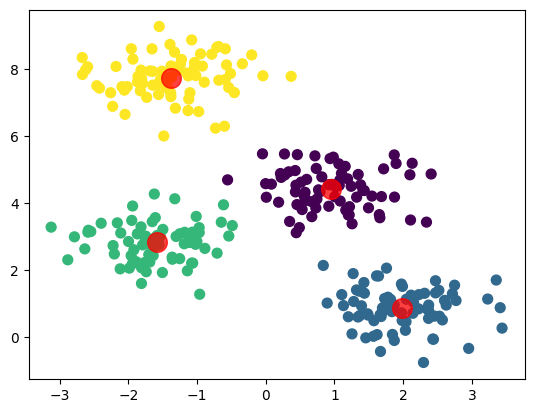

In [ ]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.show()